## Parameter estimation by optimization

When doing statistical inference, we speak the language of probability. A probability distribution that describes your data has parameters. So, a major goal of statistical inference is to estimate the values of these parameters, which allows us to concisely and unambiguously describe our data and draw conclusions from it. 

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines
sns.set_style("whitegrid")

np.random.seed(88)

In [21]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

In [4]:
light = pd.read_csv("datasets/st1/michelson_speed_of_light.csv")
light.head()

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,5-Jun,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.1,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.5,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [5]:
speed = light["velocity of light in air (km/s)"]
speed.head()

0    299850
1    299740
2    299900
3    300070
4    299930
Name: velocity of light in air (km/s), dtype: int64

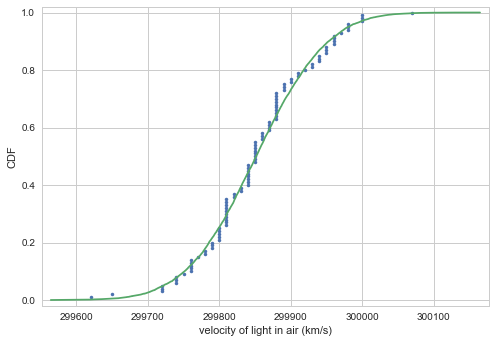

In [26]:
mean = np.mean(speed)
std = np.std(speed)

samples = np.random.normal(mean, std, size = 10000)

x, y = ecdf(speed)
x_theory, y_theory = ecdf(samples)

_ = plt.plot(x, y, marker = ".", linestyle = "none")
_ = plt.plot(x_theory, y_theory)

_ = plt.xlabel("velocity of light in air (km/s)")
_ = plt.ylabel("CDF")

plt.margins(0.02)
plt.show()

Optimal parameters are parameter values that bring the model in closest agreement with the data.

### Linear regression by least squares

* Least squares: The process of finding the parameters for which the sum of the squares of the residuals is minimal.

In [28]:
df_all_states = pd.read_csv("datasets/st1/2008_all_states.csv")
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [29]:
total_votes = df_all_states["total_votes"]
dem_share = df_all_states["dem_share"]

In [30]:
slope, intercept = np.polyfit(total_votes, dem_share, 1)

print("Slope:", slope)
print("Intercept:", intercept)

Slope: 3.37055368645e-05
Intercept: 40.8087905358


In [35]:
litfert = pd.read_csv("datasets/st2/female_literacy_fertility.csv")

In [36]:
litfert["illiteracy"] = 100 - litfert["female literacy"]
litfert.head()

,Country,Continent,female literacy,fertility,population,illiteracy
0,Chine,ASI,90.5,1.769,"1,324,655,000",9.5
1,Inde,ASI,50.8,2.682,"1,139,964,932",49.2
2,USA,NAM,99.0,2.077,"304,060,000",1.0
3,Indonésie,ASI,88.8,2.132,"227,345,082",11.2
4,Brésil,LAT,90.2,1.827,"191,971,506",9.8


In [37]:
illiteracy = litfert["illiteracy"]
fertility = litfert["fertility"]

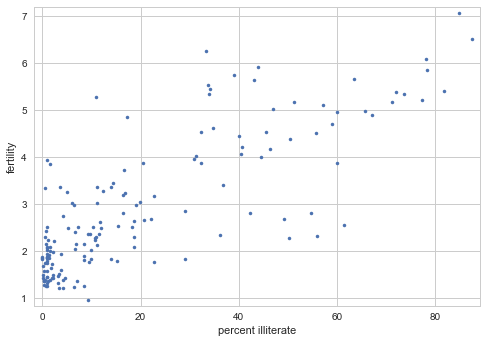

In [40]:
_ = plt.plot(illiteracy, fertility, marker = ".", linestyle = "none")
_ = plt.xlabel("percent illiterate")
_ = plt.ylabel("fertility")

plt.margins(0.02)

plt.show()

In [41]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

In [42]:
print(pearson_r(illiteracy, fertility))

0.804132402682
